# Exploratory Data Analysis

## Imports

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
%matplotlib inline

## Reading the file

In [3]:
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

#### Basic Informations

In [4]:
 data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [7]:
("Data shape: ", data.shape)

('Data shape: ', (12043, 23))

In [8]:
print("Number of unique customer ID's: ", data.customer_id.nunique())

Number of unique customer ID's:  100


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [10]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [11]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing_percentage = round(missing / len(data), 3) * 100
pd.DataFrame({"Number of missing values": missing, "Percentage": missing_percentage}).sort_values(by = "Percentage", ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


In [12]:
data.long_lat.head()

0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

In [13]:
data.status.value_counts(dropna = False)

authorized    7717
posted        4326
Name: status, dtype: int64

In [14]:
data.txn_description.value_counts(dropna = False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

C:\Users\02tuh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Balance distribution')

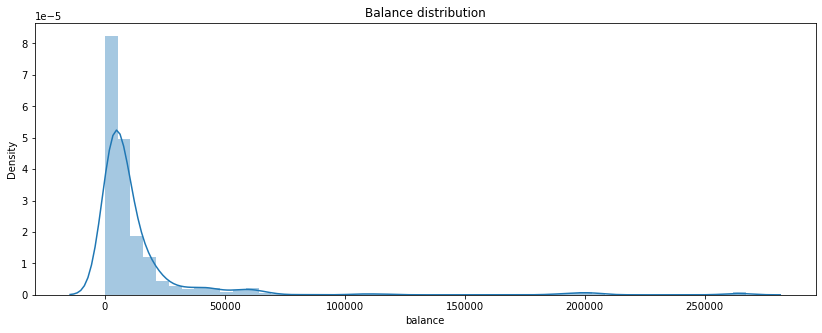

In [17]:
plt.figure(figsize = (14,5))
sns.distplot(data.balance)
plt.title("Balance distribution")

C:\Users\02tuh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

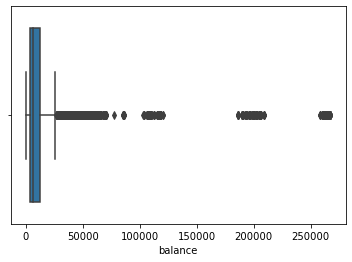

In [18]:
sns.boxplot(data.balance)

### Age Distribution

C:\Users\02tuh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

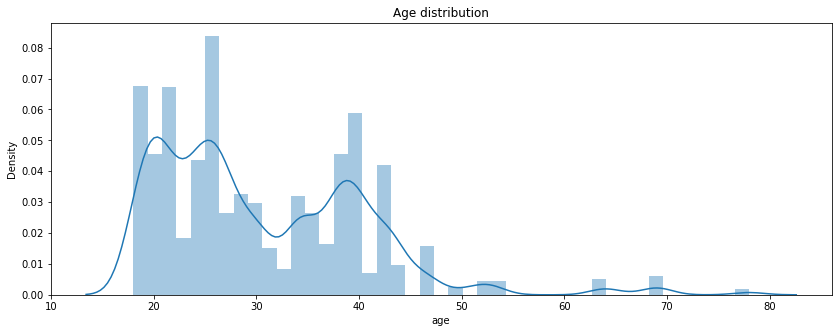

In [19]:
plt.figure(figsize = (14, 5))
sns.distplot(data.age)
plt.title("Age distribution")

### Transactions by category

C:\Users\02tuh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by category')

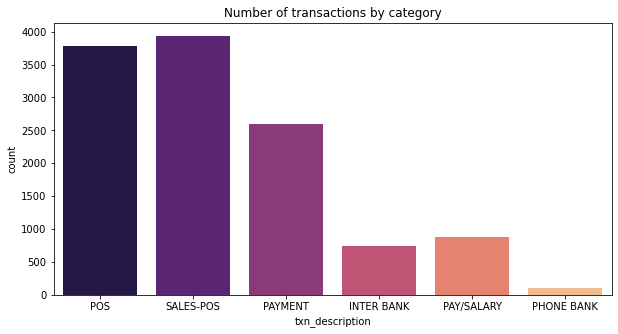

In [20]:
plt.figure(figsize = (10, 5))
sns.countplot(data.txn_description,palette='magma')
plt.title("Number of transactions by category")

Text(0.5, 1.0, 'Average transaction volume by category')

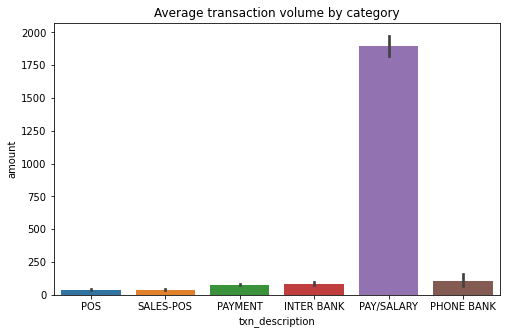

In [21]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "txn_description", y = "amount", data = data)
plt.title("Average transaction volume by category")

### Gender Distribution

In [22]:
data.gender.value_counts(dropna = False)

M    6285
F    5758
Name: gender, dtype: int64

C:\Users\02tuh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by gender')

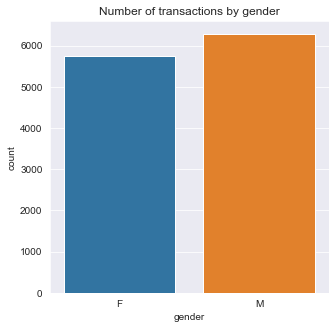

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize = (5, 5))
sns.countplot(data.gender)
plt.title("Number of transactions by gender")

Text(0.5, 1.0, 'Average transaction volume by gender')

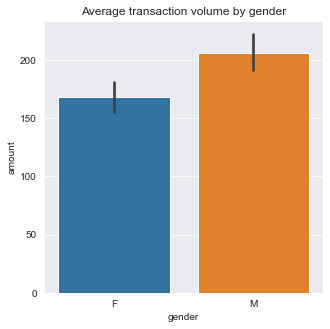

In [26]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "gender", y = "amount", data = data)
plt.title("Average transaction volume by gender")

### Merchant State and Suburbs

In [27]:
data.merchant_state.value_counts(dropna = False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [28]:
data.merchant_suburb.value_counts(dropna = False)

NaN                4326
Melbourne           255
Sydney              233
Southport            82
Brisbane City        79
                   ... 
New Norfolk           1
Hornsby Heights       1
Nulsen                1
Woodville North       1
Coolum Beach          1
Name: merchant_suburb, Length: 1610, dtype: int64

C:\Users\02tuh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by state')

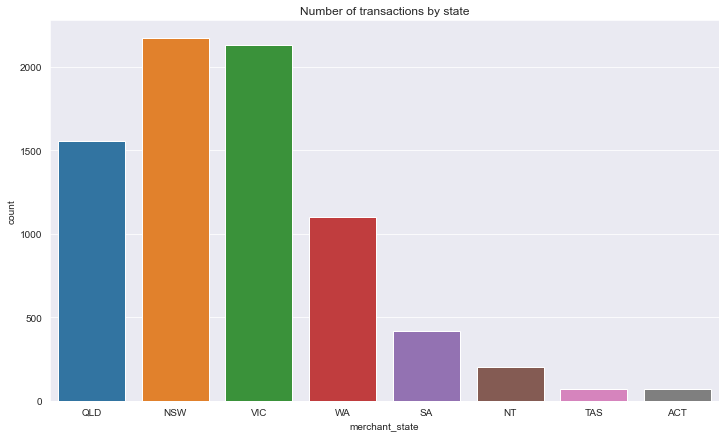

In [29]:
plt.figure(figsize = (12, 7))
sns.countplot(data.merchant_state)
plt.title("Number of transactions by state")

Text(0.5, 1.0, 'Average transaction volume by state')

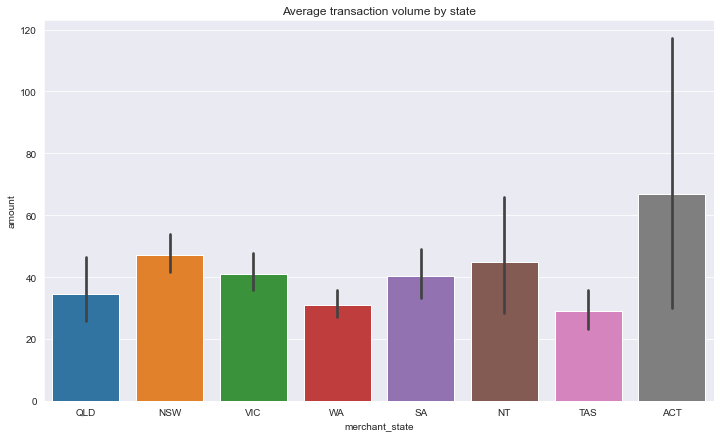

In [30]:
plt.figure(figsize = (12, 7))
sns.barplot(x = "merchant_state", y = "amount", data = data)
plt.title("Average transaction volume by state")

In [31]:
data[["date", "extraction"]].head()

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000


In [32]:
data.merchant_long_lat.head()

0    153.38 -27.99
1    151.21 -33.87
2    151.21 -33.87
3    153.05 -26.68
4    153.44 -28.06
Name: merchant_long_lat, dtype: object

### Movement Types

In [33]:
data.movement.value_counts(dropna = False)

debit     11160
credit      883
Name: movement, dtype: int64

C:\Users\02tuh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by movement')

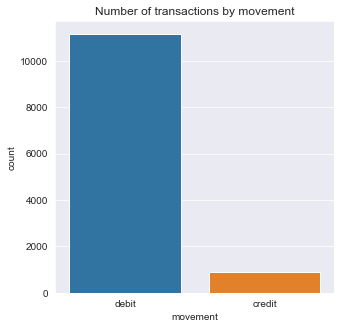

In [34]:

plt.figure(figsize = (5 ,5))
sns.countplot(data.movement)
plt.title("Number of transactions by movement")

Debit movement is much higher compared to credit movement

Text(0.5, 1.0, 'Average transaction volume by movement')

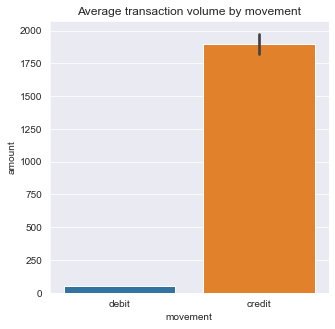

In [35]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "movement", y = "amount", data = data)
plt.title("Average transaction volume by movement")

The amount in credit movement were much higher compared to the amount in debit movement

### Amount Distribution

C:\Users\02tuh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amount distribution')

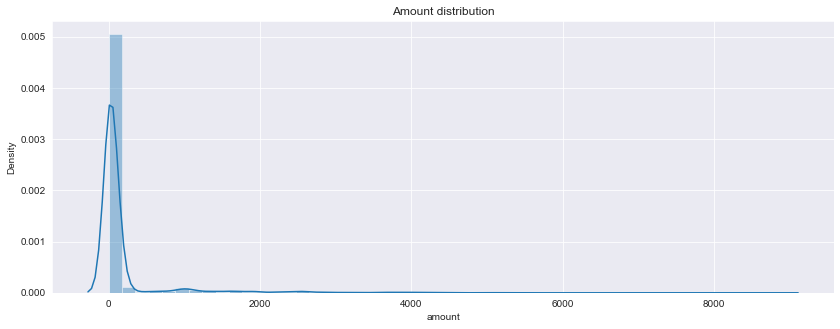

In [36]:
plt.figure(figsize = (14, 5))
sns.distplot(data.amount)
plt.title("Amount distribution")

In [37]:
data.currency.value_counts(dropna = False)

AUD    12043
Name: currency, dtype: int64

Everyone use the same currency type. So this column doesn't provide with much information

In [38]:
data.country.value_counts(dropna = False)

Australia    12043
Name: country, dtype: int64

Every transactions are done within Australia

## Dropping Unwanted Columns

In [39]:
data = data.drop(["currency", "country"], axis = 1)

## Cleaning Data

### Managing missing data

<AxesSubplot:>

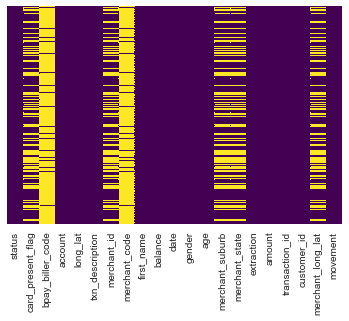

In [40]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

So we can see the yellow spots above in the heatmap are the places where data is missing

In [41]:
pd.DataFrame({"Number of missing values": missing, "Percentage": missing_percentage}).sort_values(by = "Percentage", ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


Since merchant_code and bpay_biller_code have missing data of 92.7%. So we can drop the columns

In [42]:
data = data.drop(["merchant_code", "bpay_biller_code"], axis = 1)

In [43]:
nonSales = data.loc[(data.txn_description != "SALES-POS") | (data.txn_description != "POS"), :]
nonSales.isnull().sum().sort_values(ascending = False)

merchant_suburb      4326
merchant_long_lat    4326
merchant_id          4326
merchant_state       4326
card_present_flag    4326
status                  0
customer_id             0
transaction_id          0
amount                  0
extraction              0
gender                  0
age                     0
date                    0
balance                 0
first_name              0
txn_description         0
long_lat                0
account                 0
movement                0
dtype: int64

### Managing the remainig missing datas

In [44]:
cols = ["card_present_flag", "merchant_state", "merchant_suburb", "merchant_id", "merchant_long_lat"]
for col in cols:
    data[col].fillna("n/a", inplace = True)

<AxesSubplot:>

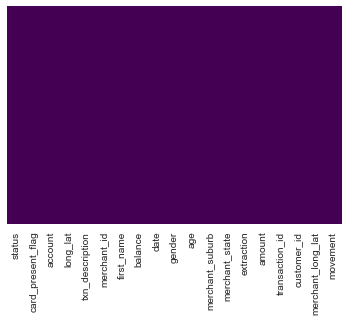

In [45]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are no more yellow spots in the heatmap.

In [46]:
data.isnull().sum().max()

0

So now we don't have any columns with missing datas

### Time features And Month Features

In [48]:
daily_amount = pd.DataFrame(data.groupby("date").amount.sum())
daily_amount.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


In [49]:
data["month"] = pd.DatetimeIndex(data.date).month
data["dayofweek"] = pd.DatetimeIndex(data.date).dayofweek
data[["date", "month", "dayofweek"]].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


In [50]:
data.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [51]:
data["extraction"] = [timestamp.split("T")[1].split(".")[0] for timestamp in data.extraction]
data.extraction.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [52]:
data["hour"] = [time.split(":")[0] for time in data.extraction]
data[["extraction", "hour"]].head()

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


In [53]:
data["hour"] = pd.to_numeric(data.hour)

In [97]:
data.head()


,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,dayofweek,hour
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,1
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,1
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,1
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,1
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,1


In [54]:
purchases_amount = data.loc[(data.txn_description == "POS") | (data.txn_description == "SALES-POS"), "amount"]
purchases_amount.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

C:\Users\02tuh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Purchase transaction amount')

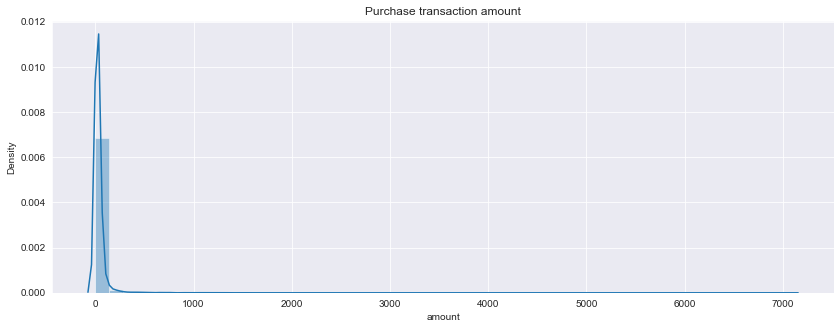

In [99]:
plt.figure(figsize = (14, 5))
sns.distplot(purchases_amount)
plt.title("Purchase transaction amount")

C:\Users\02tuh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall transaction amount')

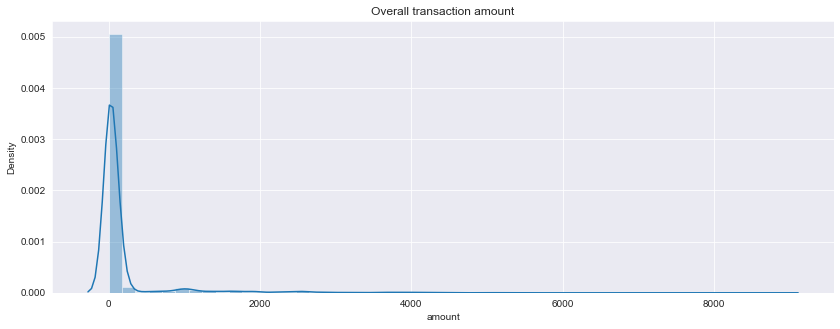

In [55]:
plt.figure(figsize = (14, 5))
sns.distplot(data.amount)
plt.title("Overall transaction amount")

In [56]:
customer_monthly_volume = pd.DataFrame(data.groupby("customer_id").amount.sum() / 3) 
customer_monthly_volume.head()

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


C:\Users\02tuh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Customers' monthly transaction volume")

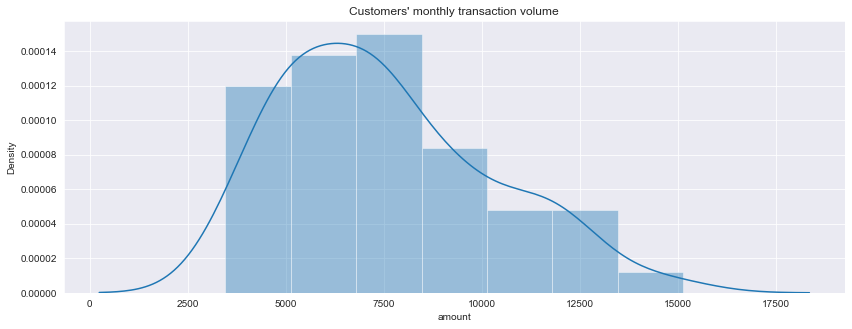

In [104]:
plt.figure(figsize = (14, 5))
sns.distplot(customer_monthly_volume.amount)
plt.title("Customers' monthly transaction volume")

Text(0.5, 1.0, 'Average transaction volume by month')

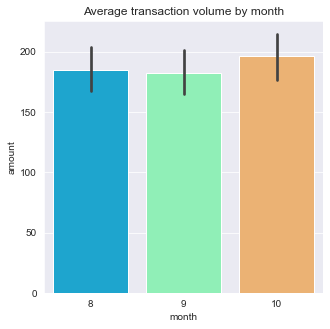

In [57]:

plt.figure(figsize = (5, 5))
sns.barplot(x = "month", y = "amount", data = data,palette='rainbow')
plt.title("Average transaction volume by month")

In [58]:

average_daily_volume = pd.DataFrame(data.groupby("dayofweek").amount.mean())
average_daily_volume.head()

,amount
dayofweek,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517


Text(0.5, 0, 'Day of week')

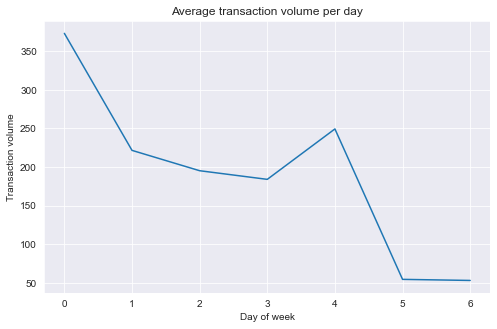

In [60]:

fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(average_daily_volume.index, average_daily_volume.amount)
plt.title("Average transaction volume per day")
plt.ylabel("Transaction volume")
plt.xlabel("Day of week")

In [59]:
data.txn_description.value_counts()


SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

Now we will divide the transactions categories into 3 types i.e. Salary type, Purchase type and Others

In [61]:
data.loc[data.txn_description == "PAY/SALARY", "category"] = "Salary"
data.loc[(data.txn_description == "SALES-POS") | (data.txn_description == "POS"), "category"] = "Purchase"
data.category.fillna("Others", inplace = True)
data[["txn_description", "category"]].head(10)

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
5,PAYMENT,Others
6,SALES-POS,Purchase
7,POS,Purchase
8,POS,Purchase
9,INTER BANK,Others


### Transaction type distribution

Text(0.5, 0, 'Day of week')

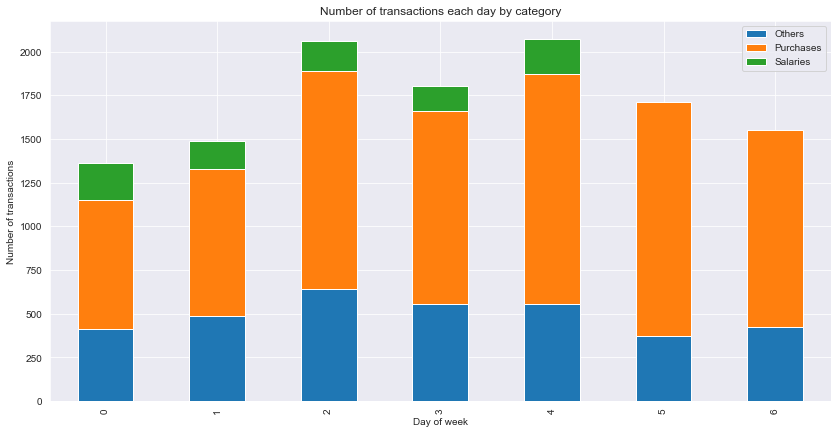

In [62]:
stacked_barplot = pd.DataFrame(data.groupby(["dayofweek", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (14, 7))
plt.title("Number of transactions each day by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Day of week")

In [63]:
average_hourly_volume = pd.DataFrame(data.groupby("hour").amount.mean())
average_hourly_volume.head()

,amount
hour,
0,28.274907
1,48.716402
2,75.269764
3,84.725918
4,61.301845


Text(0.5, 0, 'Hour')

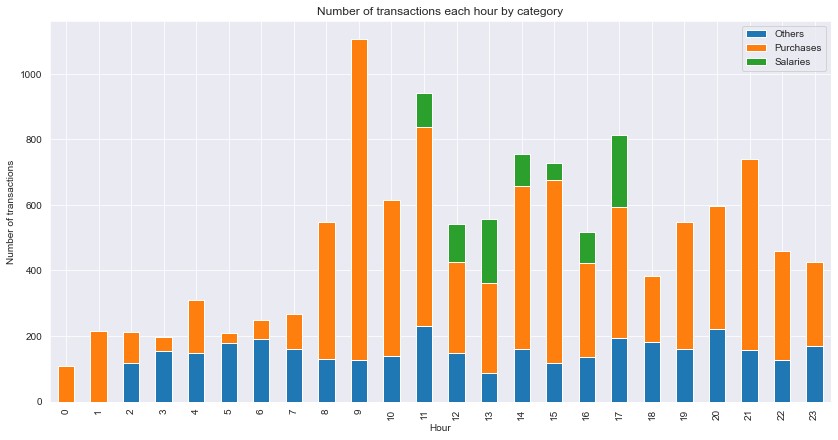

In [117]:
stacked_barplot = pd.DataFrame(data.groupby(["hour", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (14, 7))
plt.title("Number of transactions each hour by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Hour")

# Predictive Analytics

In [68]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,dayofweek,hour,category
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,1,Purchase
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,1,Purchase
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,1,Purchase
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,1,Purchase
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,1,Purchase


In [69]:
pd.DataFrame({"Columns": data.columns})

,Columns
0,status
1,card_present_flag
2,account
3,long_lat
4,txn_description
5,merchant_id
6,first_name
7,balance
8,date
9,gender


In [70]:
salary_df = pd.DataFrame({"customer_id": data.customer_id.unique()})
salary_df.head()


,customer_id
0,CUS-2487424745
1,CUS-2142601169
2,CUS-1614226872
3,CUS-2688605418
4,CUS-4123612273


In [74]:
df_freq = []
df_amount = []

for customer in range(len(salary_df)):
    salary = data.loc[(data.customer_id == salary_df.customer_id[customer]) & (data.txn_description == "PAY/SALARY"), ["date", "amount"]].groupby("date", as_index = False).sum()
    count = len(salary)
    if count == 0:
        df_amount.append(np.nan)
        df_freq.append(np.nan)
    else:
        days_between_payments = []
        for date in range(len(salary)-1):
            days_between_payments.append((salary.date[date + 1] - salary.date[date]).days)
        df_freq.append(max(days_between_payments))
        df_amount.append(mode(salary.amount))

salary_df["salary_freq"] = df_freq
salary_df["salary_amount"] = df_amount       
salary_df["annual_salary"] = salary_df["salary_amount"] / salary_df["salary_freq"] * 365.25
salary_df.head()

,customer_id,salary_freq,salary_amount,annual_salary
0,CUS-2487424745,7,1013.67,52891.852500
1,CUS-2142601169,7,1002.13,52289.711786
2,CUS-1614226872,7,892.09,46547.981786
3,CUS-2688605418,14,2320.30,60534.969643
4,CUS-4123612273,7,1068.04,55728.801429


C:\Users\02tuh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Annual salary')

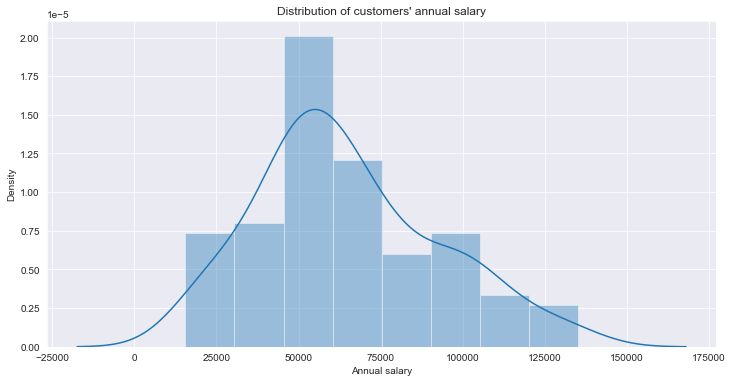

In [76]:
plt.figure(figsize = (12, 6))
sns.distplot(salary_df.annual_salary)
plt.title("Distribution of customers' annual salary")
plt.xlabel("Annual salary")

In [77]:
unique_id = data.customer_id.unique()
len(unique_id)

100

#### Average No. of Weekly Transactions

In [78]:

avg_no_weekly_trans = []
for id_ in unique_id:
    array = data.loc[data.customer_id == id_, "date"]
    avg_no_weekly_trans.append(round(len(array)/array.nunique()*7))
avg_no_weekly_trans[:5]

[48, 29, 24, 14, 21]

#### Maximum Amount

In [79]:

max_amount = []
for id_ in unique_id:
    array = data.loc[data.customer_id == id_, "amount"]
    max_amount.append(max(array))
max_amount[:5]

[1452.21, 2349.55, 892.09, 2320.3, 1068.04]

#### No. of large transactions

In [80]:
no_large_trans = []
for id_ in unique_id:
    count = 0
    array = data.loc[data.customer_id == id_, "amount"]
    for amount in array:
        if amount > 100:
            count += 1
    no_large_trans.append(count)
no_large_trans[:5]

[22, 23, 22, 25, 32]

#### Number of days with Transactions

In [81]:
no_days_with_trans = []
for id_ in unique_id:
    array = data.loc[data.customer_id == id_, "date"]
    no_days_with_trans.append(array.nunique())
no_days_with_trans[:5]

[85, 74, 76, 63, 44]

#### Average transaction amount

In [82]:

avg_trans_amount = []
for id_ in unique_id:
    array = data.loc[data.customer_id == id_, "amount"]
    avg_trans_amount.append(array.mean())
avg_trans_amount[:5]

[45.34877162629756,
 78.20610561056101,
 74.46501930501928,
 159.3041860465116,
 166.50835820895517]

#### Median Balance


In [83]:

median_balance = []
for id_ in unique_id:
    array = data.loc[data.customer_id == id_, "balance"]
    median_balance.append(array.median())
median_balance[:5]

[1580.4, 1132.66, 3618.5, 5616.63, 6162.45]

#### State

In [84]:
state = []
for id_ in unique_id:
    array = data.loc[data.customer_id == id_, "merchant_state"]
    state.append(mode(array))
state[:5]

['QLD', 'NSW', 'QLD', 'NSW', 'VIC']

#### Age

In [85]:
age = []
for id_ in unique_id:
    array = data.loc[data.customer_id == id_, "age"]
    age.append(mode(array))
age[:5]

[26, 38, 40, 20, 43]

#### Gender

In [86]:
gender = []
for id_ in unique_id:
    array = data.loc[data.customer_id == id_, "gender"]
    gender.append(mode(array))
gender[:5]

['F', 'M', 'F', 'M', 'F']

### Assembling all datas

In [87]:
features_df = pd.DataFrame({"customer_id": unique_id, 
                            "avg_no_weekly_trans": avg_no_weekly_trans, 
                            "max_amount": max_amount, 
                            "no_large_trans": no_large_trans,
                            "avg_trans_amount": avg_trans_amount,
                            "median_balance": median_balance, 
                            "state": state,
                            "age": age,
                            "gender": gender})
features_df.head()

,customer_id,avg_no_weekly_trans,max_amount,no_large_trans,avg_trans_amount,median_balance,state,age,gender
0,CUS-2487424745,48,1452.21,22,45.348772,1580.40,QLD,26,F
1,CUS-2142601169,29,2349.55,23,78.206106,1132.66,NSW,38,M
2,CUS-1614226872,24,892.09,22,74.465019,3618.50,QLD,40,F
3,CUS-2688605418,14,2320.30,25,159.304186,5616.63,NSW,20,M
4,CUS-4123612273,21,1068.04,32,166.508358,6162.45,VIC,43,F


In [88]:
salary_df.head()

,customer_id,salary_freq,salary_amount,annual_salary
0,CUS-2487424745,7,1013.67,52891.852500
1,CUS-2142601169,7,1002.13,52289.711786
2,CUS-1614226872,7,892.09,46547.981786
3,CUS-2688605418,14,2320.30,60534.969643
4,CUS-4123612273,7,1068.04,55728.801429


In [89]:
df = pd.concat([features_df, salary_df.annual_salary], axis = 1)
df.head()


,customer_id,avg_no_weekly_trans,max_amount,no_large_trans,avg_trans_amount,median_balance,state,age,gender,annual_salary
0,CUS-2487424745,48,1452.21,22,45.348772,1580.40,QLD,26,F,52891.852500
1,CUS-2142601169,29,2349.55,23,78.206106,1132.66,NSW,38,M,52289.711786
2,CUS-1614226872,24,892.09,22,74.465019,3618.50,QLD,40,F,46547.981786
3,CUS-2688605418,14,2320.30,25,159.304186,5616.63,NSW,20,M,60534.969643
4,CUS-4123612273,21,1068.04,32,166.508358,6162.45,VIC,43,F,55728.801429


In [93]:
df.isnull().sum()

customer_id            0
avg_no_weekly_trans    0
max_amount             0
no_large_trans         0
avg_trans_amount       0
median_balance         0
state                  0
age                    0
gender                 0
annual_salary          0
dtype: int64

## Importing Sklearn Libraries

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report

### Training the test datas

In [95]:

X = df.drop(["customer_id", "annual_salary"], axis = 1)
Y = df.annual_salary
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (100, 8)
Y shape:  (100,)


In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (70, 8)
Y_train shape:  (70,)
X_test shape:  (30, 8)
Y_test shape:  (30,)


In [97]:
ohe = OneHotEncoder(sparse = False)
scaler = StandardScaler()
column_transform = make_column_transformer((ohe, ["state", "gender"]), (scaler, ["avg_no_weekly_trans", "max_amount", "no_large_trans", "avg_trans_amount", "median_balance", "age"]))

### Linear Regression

In [98]:
lm = LinearRegression()
lm_pipeline = make_pipeline(column_transform, lm)

In [99]:
lm_pipeline.fit(X_train, Y_train)
lm_pred = lm_pipeline.predict(X_test)

In [100]:
print("RMSE: ", round(np.sqrt(mean_squared_error(lm_pred, Y_test))))

RMSE:  27836


### Decision Tree

In [101]:
tree = DecisionTreeRegressor()
tree_pipeline = make_pipeline(column_transform, tree)

In [102]:
tree_pipeline.fit(X_train, Y_train)
tree_pred = tree_pipeline.predict(X_test)

In [103]:
print("RMSE: ", round(np.sqrt(mean_squared_error(tree_pred, Y_test))))

RMSE:  23163


## Result

The RMSE of the decision tree is better than the RMSE of the linear regression. But still the accuracy can be improved.
